In [1]:
import os
import json
import warnings

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from synthesized.testing.evaluation import Evaluation
from synthesized.testing import synthetic_distributions as syn_dist
from synthesized.testing import metrics as eval_metrics
from synthesized.testing import plotting as syn_plot
branch = os.environ.get('evaluation_branch', 'n/a')
revision = os.environ.get('evaluation_revision', 'n/a')
group = "synthetic"
config_path = os.environ.get('evaluation_config_path', "configs/evaluation/synthetic_distributions.json")
with open(config_path, 'r') as f:
    configs = json.load(f)
    config = configs["instances"]["synthetic"]
evaluation = Evaluation(branch=branch, revision=revision, group=group)

W1210 14:50:07.288942 4486047168 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2D31-322D-B531
Expires at: 2019-12-31 00:00:00


### Gauss "ball" outside of center

In [3]:
data = syn_dist.create_gauss_ball(x_mean=1000, x_std=100, y_mean=100, y_std=10, size=10000)

W1210 13:46:25.597172 4471006656 deprecation.py:323] From /Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/tensorflow_probability/python/stats/sample_stats.py:459: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1210 13:46:25.602012 4471006656 deprecation.py:323] From /Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/tensorflow_probability/python/stats/sample_stats.py:693: setdiff1d (from tensorflow.python.ops.array_ops) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


took 21.638361930847168 s
Metrics:
avg_distance: 0.03195


## Plot data

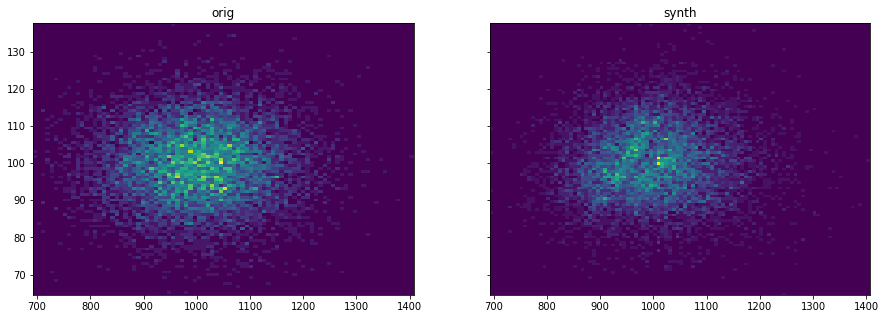

In [4]:
_ = syn_plot.synthesize_and_plot(data, 'ball', evaluation=evaluation, metrics=eval_metrics.default_metrics, 
                                 config=config)

### Gauss "ball" around of zero

In [5]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=100, y_mean=0, y_std=10, size=10000)

took 29.79768991470337 s
Metrics:
avg_distance: 0.009600000000000001


## Plot data

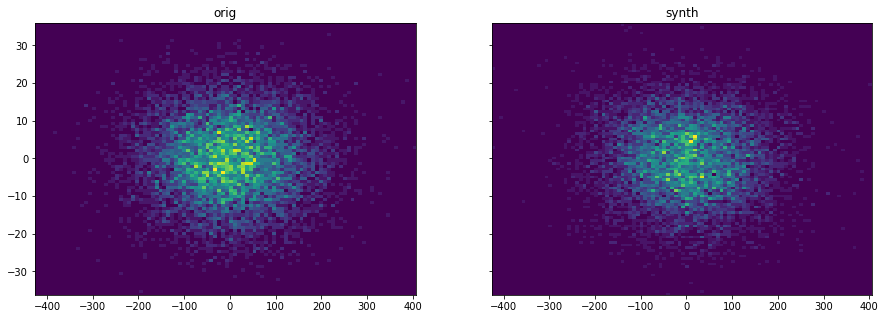

In [6]:
_ = syn_plot.synthesize_and_plot(data, 'ball_ext', evaluation=evaluation, metrics=eval_metrics.default_metrics, 
                                 config=config)

### Correlated Gaussian far from zero

In [7]:
data = syn_dist.create_gauss_ball(x_mean=1000, x_std=100, y_mean=100, y_std=10, size=10000, cor=0.8)

took 13.520527839660645 s
Metrics:
avg_distance: 0.03325
max_correlation_distance: 0.11078426457288038


## Plot data

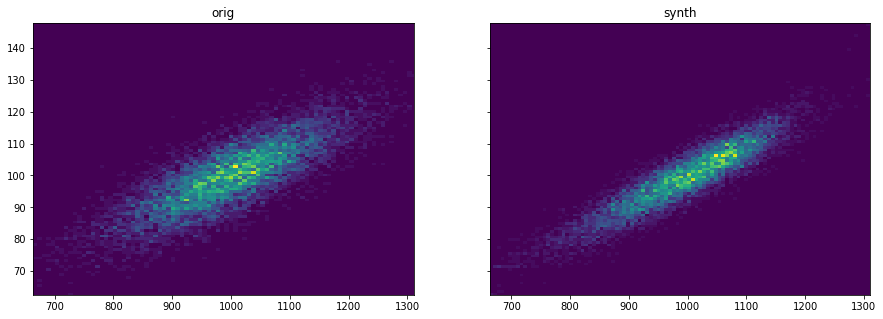

In [9]:
metrics = dict(eval_metrics.default_metrics)
metrics["max_correlation_distance"] = eval_metrics.max_correlation_distance
_ = syn_plot.synthesize_and_plot(data, 'corr_ball_far', evaluation=evaluation, metrics=metrics, 
                                 config=config)

### Correlated Gaussian around zero

In [10]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=100, y_mean=0, y_std=10, size=10000, cor=0.8)

took 26.41431975364685 s
Metrics:
avg_distance: 0.039650000000000005
max_correlation_distance: 0.020700711005199768


## Plot data

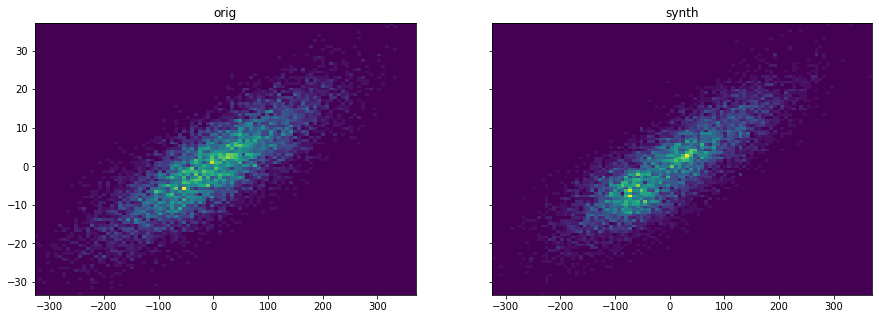

In [11]:
metrics = dict(eval_metrics.default_metrics)
metrics["max_correlation_distance"] = eval_metrics.max_correlation_distance
_ = syn_plot.synthesize_and_plot(data, 'corr_ball_zero', evaluation=evaluation, metrics=metrics, 
                                 config=config)

### Line of noise that far from zero

In [12]:
data = syn_dist.create_line(x_range=(0, 1000), intercept=100, slope=-0.1, y_std=10, size=10000)

took 28.71959114074707 s
Metrics:
avg_distance: 0.0228


## Plot data

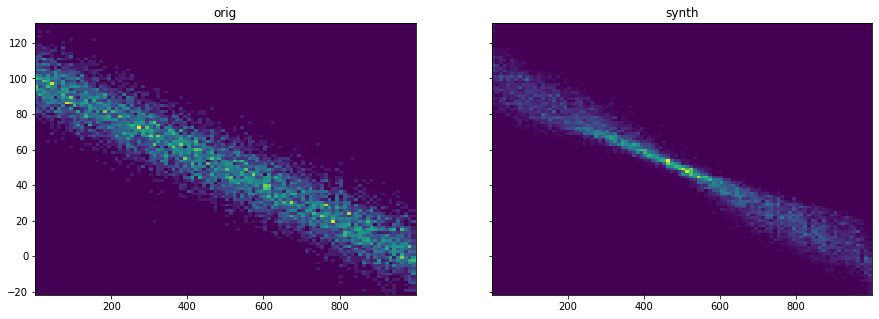

In [13]:
_ = syn_plot.synthesize_and_plot(data, 'line', evaluation=evaluation, metrics=eval_metrics.default_metrics, 
                                 config=config)

### Line of noise that comes from zero

In [14]:
data = syn_dist.create_line(x_range=(0, 1000), intercept=0, slope=0.1, y_std=10, size=10000)

took 19.51005220413208 s
Metrics:
avg_distance: 0.01735


## Plot data

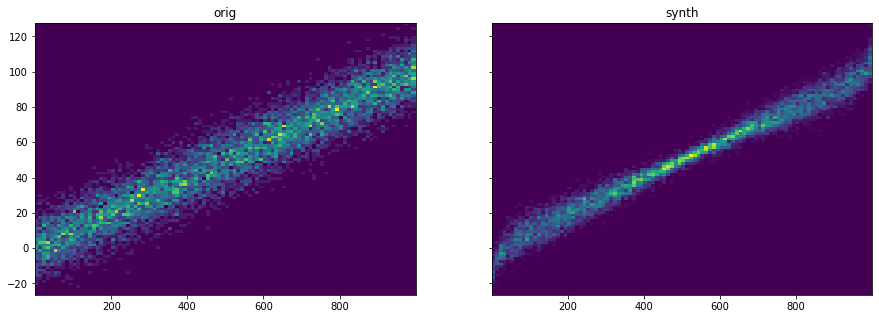

In [15]:
_ = syn_plot.synthesize_and_plot(data, 'line_ext', evaluation=evaluation, metrics=eval_metrics.default_metrics, 
                                 config=config)

### Power law distribution

In [16]:
data = syn_dist.create_power_law_distribution(shape=0.5, scale=1000, size=10000)

took 19.48283290863037 s
Metrics:
avg_distance: 0.0201


## Plot data

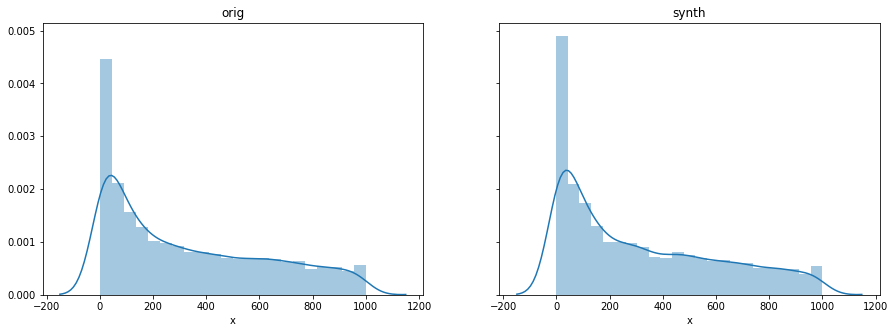

In [17]:
_ = syn_plot.synthesize_and_plot(data, 'power_law', evaluation=evaluation, metrics=eval_metrics.default_metrics, 
                                 config=config)

### Conditional distribution

In [18]:
data = syn_dist.create_conditional_distribution((10,2), (20, 5), (30, 1), size=10000)

took 25.801464796066284 s
Metrics:
avg_distance: 0.01265000000000005


## Plot data

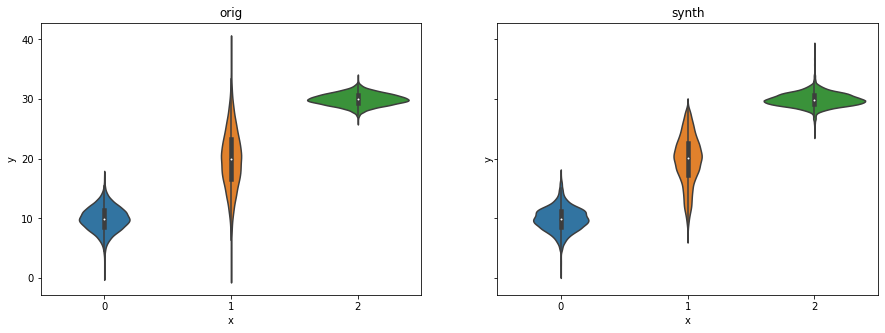

In [19]:
_ = syn_plot.synthesize_and_plot(data, 'conditional', evaluation=evaluation, metrics=eval_metrics.default_metrics, 
                                 config=config)

### Bernoulli distribution

In [20]:
data = syn_dist.create_bernoulli(probability=0.5, size=10000)

took 18.740544080734253 s
Metrics:
avg_distance: 0.0189


## Plot data

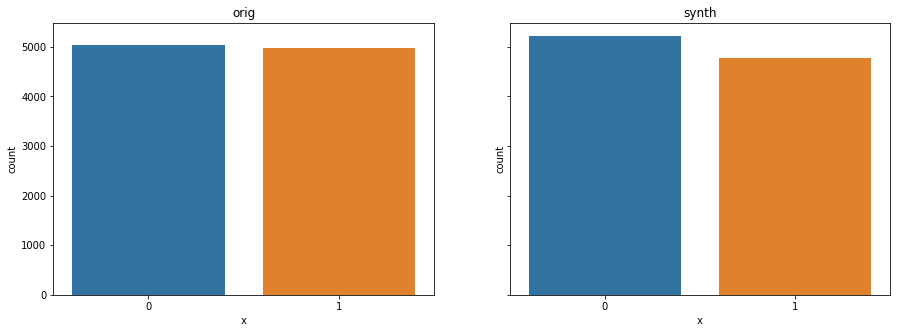

In [21]:
_ = syn_plot.synthesize_and_plot(data, 'bernoulli_50/50', evaluation=evaluation, metrics=eval_metrics.default_metrics, 
                                 config=config)

In [22]:
data = syn_dist.create_bernoulli(probability=0.2, size=10000)

took 13.76584792137146 s
Metrics:
avg_distance: 0.0524


## Plot data

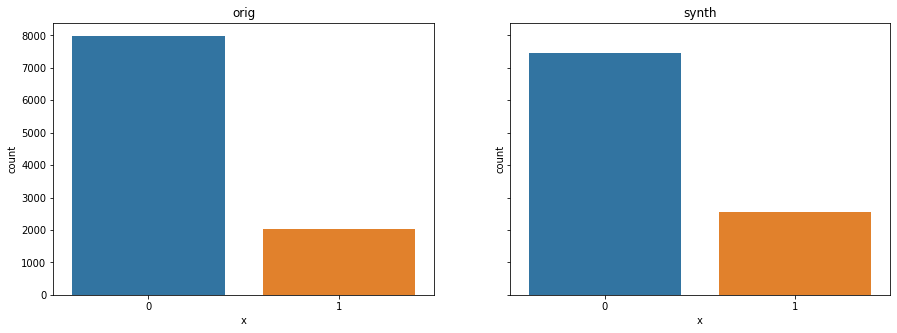

In [23]:
_ = syn_plot.synthesize_and_plot(data, 'bernoulli_20/80', evaluation=evaluation, metrics=eval_metrics.default_metrics, 
                                 config=config)

### Categorical distribution

In [24]:
data = syn_dist.create_uniform_categorical(n_classes=100, size=100000)

took 21.44838309288025 s
Metrics:
avg_distance: 0.02426000000000006


## Plot data

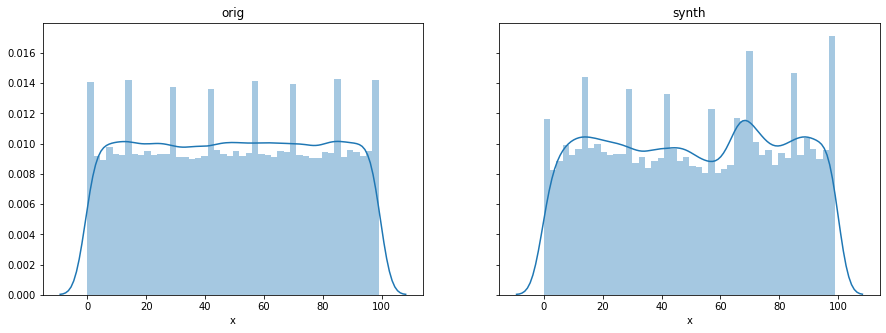

In [25]:
_ = syn_plot.synthesize_and_plot(data, 'categorical_uniform', evaluation=evaluation, 
                                 metrics=eval_metrics.default_metrics, 
                                 config=config)

In [26]:
data = syn_dist.create_power_law_categorical(n_classes=10, size=10000)

took 25.275774002075195 s
Metrics:
avg_distance: 0.0077


## Plot data

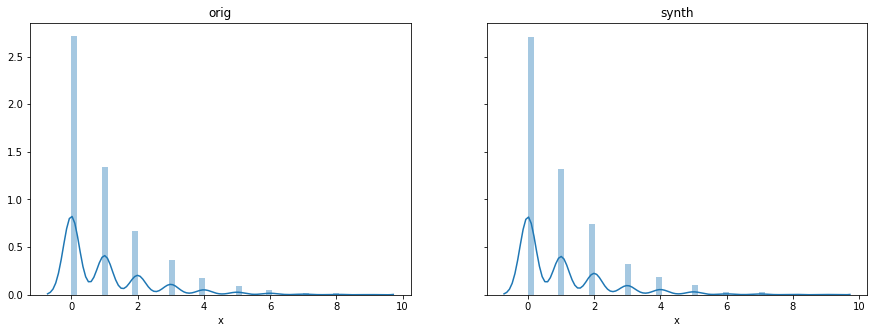

In [27]:
_ = syn_plot.synthesize_and_plot(data, 'categorical_powerlaw', evaluation=evaluation, 
                                 metrics=eval_metrics.default_metrics, 
                                 config=config)

In [28]:
data = syn_dist.create_mixed_continuous_categorical(n_classes=10, size=10000)

took 22.463953018188477 s
Metrics:
avg_distance: 0.0283


## Plot data

## Show correlation matrices

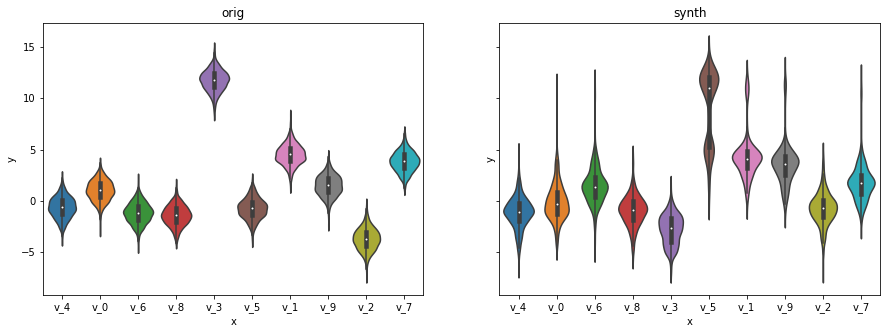

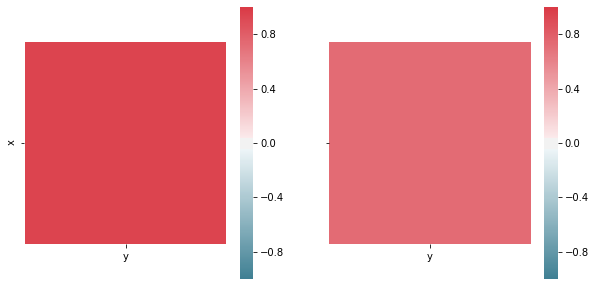

In [29]:
_ = syn_plot.synthesize_and_plot(data, 'mixed_categorical_continuous', evaluation=evaluation,
                                 metrics=eval_metrics.default_metrics, config=config, show_anova=True)

In [30]:
data = syn_dist.create_correlated_categorical(n_classes=10, size=10000, sd=1.)

took 21.047662019729614 s
Metrics:
avg_distance: 0.0204


## Plot data

## Show categorical R^2

         Current function value: 1.942613
         Iterations: 35
         Function evaluations: 107
         Gradient evaluations: 107


/Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 2.187743
         Iterations: 35
         Function evaluations: 109
         Gradient evaluations: 109


/Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


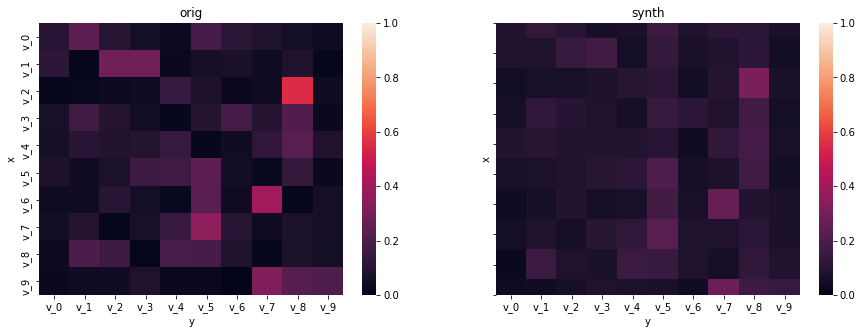

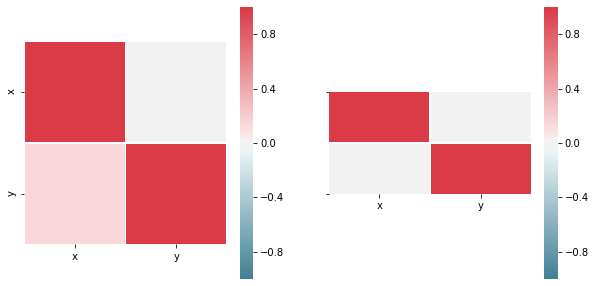

In [31]:
_ = syn_plot.synthesize_and_plot(data, 'correlated_categoricals', evaluation=evaluation,
                                 metrics=eval_metrics.default_metrics, config=config, show_cat_rsquared=True)

In [32]:
data = syn_dist.create_multidimensional_categorical(dimensions=50, n_classes=10, size=10000)

took 224.1749050617218 s
Metrics:
avg_distance: 0.032668


## Plot data

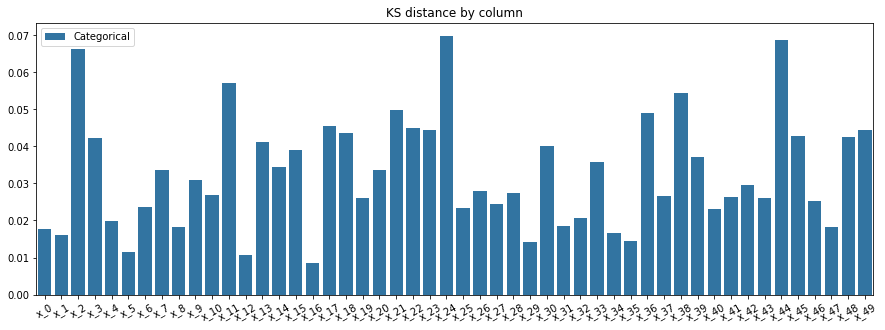

In [33]:
_ = syn_plot.synthesize_and_plot(data, 'multidimensional_categorical', evaluation=evaluation, 
                                 metrics=eval_metrics.default_metrics, config=config)

In [34]:
data = syn_dist.create_multidimensional_correlated_categorical(dimensions=50, n_classes=10, size=10000)

took 249.99717116355896 s
Metrics:
avg_distance: 0.03909599999999999


## Plot data

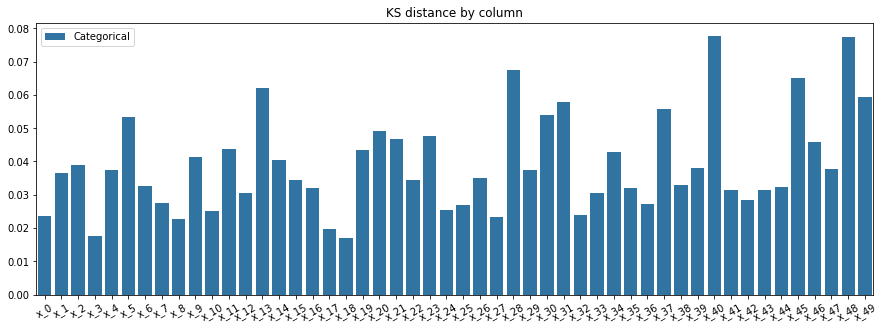

In [35]:
_ = syn_plot.synthesize_and_plot(data, 'multidimensional_correlated_categorical', evaluation=evaluation,
                                 metrics=eval_metrics.default_metrics, config=config)

In [36]:
data = syn_dist.create_multidimensional_mixed(categorical_dim=25, continuous_dim=25, n_classes=10, size=10000)

took 328.75540494918823 s
Metrics:
avg_distance: 0.037933999999999996


## Plot data

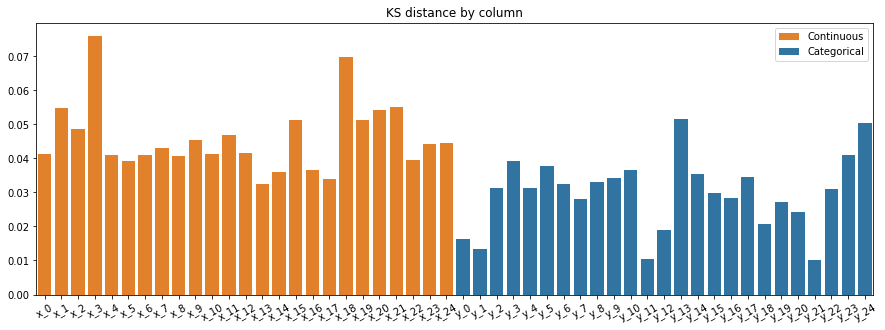

In [37]:
_ = syn_plot.synthesize_and_plot(data, 'multidimensional_mixed', evaluation=evaluation,
                                 metrics=eval_metrics.default_metrics, config=config)

In [38]:
data = syn_dist.create_multidimensional_correlated_mixed(categorical_dim=25, continuous_dim=25, n_classes=10, 
                                                         size=10000, categorical_sd=0.1, cont_sd=0.1, prior_sd=0.5)

took 416.5093319416046 s
Metrics:
avg_distance: 0.050652


## Plot data

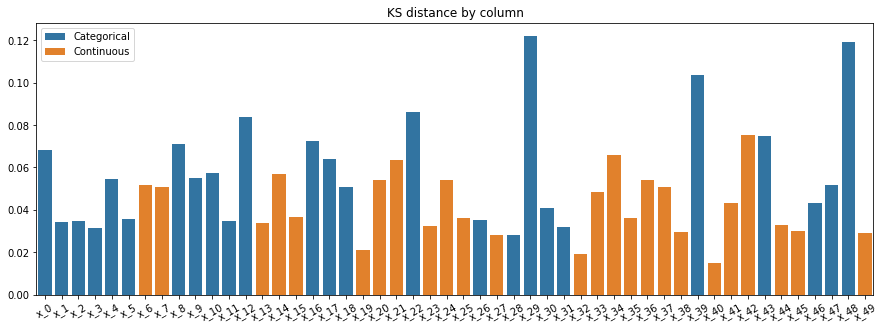

In [39]:
_ = syn_plot.synthesize_and_plot(data, 'multidimensional_correlated_mixed', evaluation=evaluation,
                                 metrics=eval_metrics.default_metrics, config=config)

In [ ]:
evaluation.write_metrics()